# 데이터 시각화하기
## 시계열 그래프 그리기

In [1]:
import pandas as pd

In [5]:
df = pd.read_excel('./files/kto_total.xlsx')

In [6]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


In [15]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = "AppleGothic"


In [16]:
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8


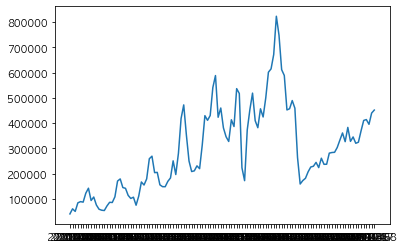

In [17]:
# 시계열 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

<Figure size 864x288 with 0 Axes>

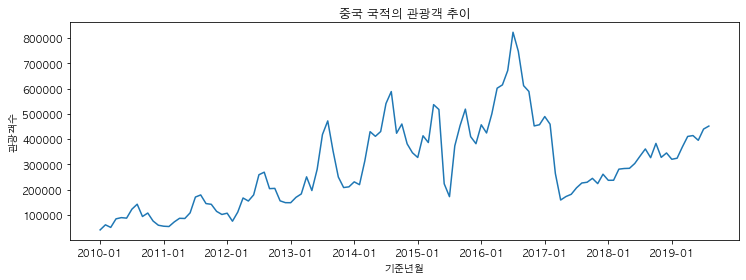

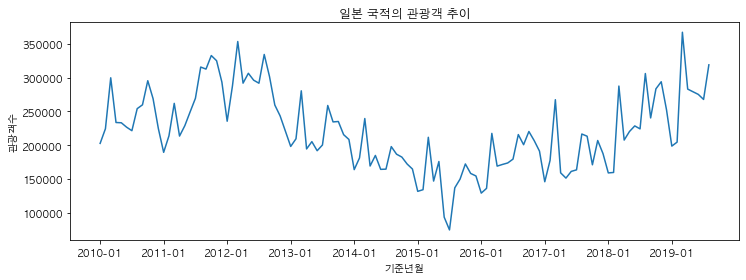

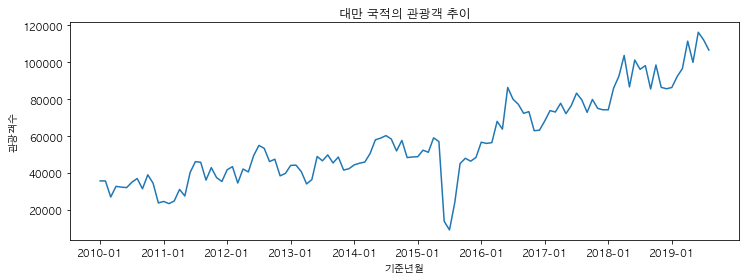

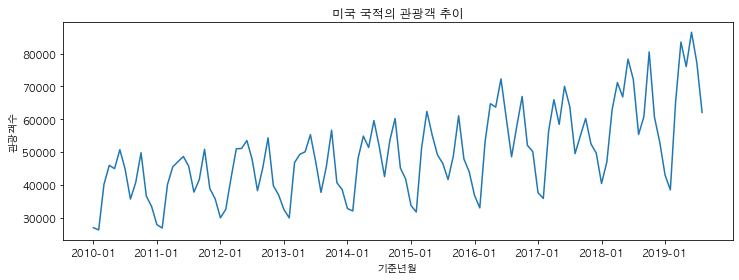

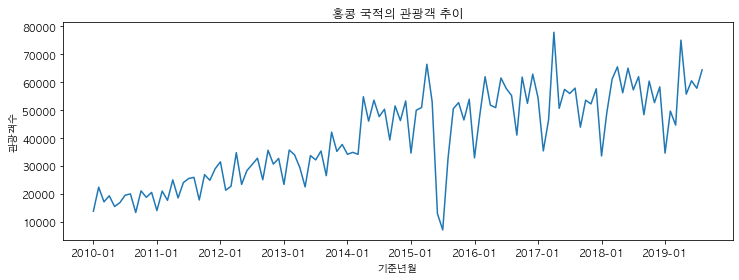

In [18]:
# 그래프 크기 조절
plt.figure(figsize = (12, 4))

# 그래프 내용 설정
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

for cntry in cntry_list:
    condition = df['국적'] == cntry
    df_filter = df[condition]
    
    plt.figure(figsize = (12, 4))
    
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
    
    plt.show()

In [19]:
# 히트맵 그리기
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1


In [21]:
# 2010-01
df['년도'] = df['기준년월'].str.slice(0, 4)
df['월'] = df['기준년월'].str.slice(5, 7)

In [22]:
df.head()
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),년도,월
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,2019,08
6959,교포,0,0,0,0,16560,16560,2019-08,교포,0.0,2019,08


In [25]:
# 히트맵 그리기
import matplotlib.pyplot as plot
import seaborn as sns



In [26]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,2010,05


In [27]:
# 집계하기
# 년/월 별로 관광객 수 집계
df_pivot = df_filter.pivot_table(values = '관광',
                                index = '년도',
                                columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


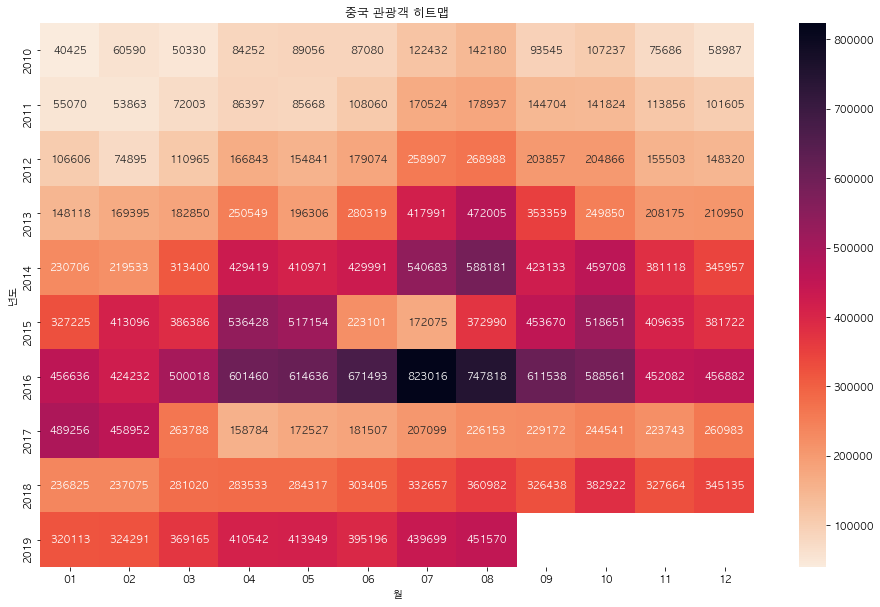

In [29]:
plt.figure(figsize= (16, 10))

# heatmap()
# 1인자 : 피봇형태의 데이터 넣기
# 2인자 : 히트맵 각 사각현 안에 실제 데이터 값을 표현할거임?
# 3인자 : 숫자 형태를 소숫점이 없는 형태로 넣고자 할 때
# 4인자 : 그래프의 색상조합

sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap ='rocket_r')

# 그래프 타이틀
plt.title('중국 관광객 히트맵')

plt.show()

In [30]:
cntry_list

['중국', '일본', '대만', '미국', '홍콩']

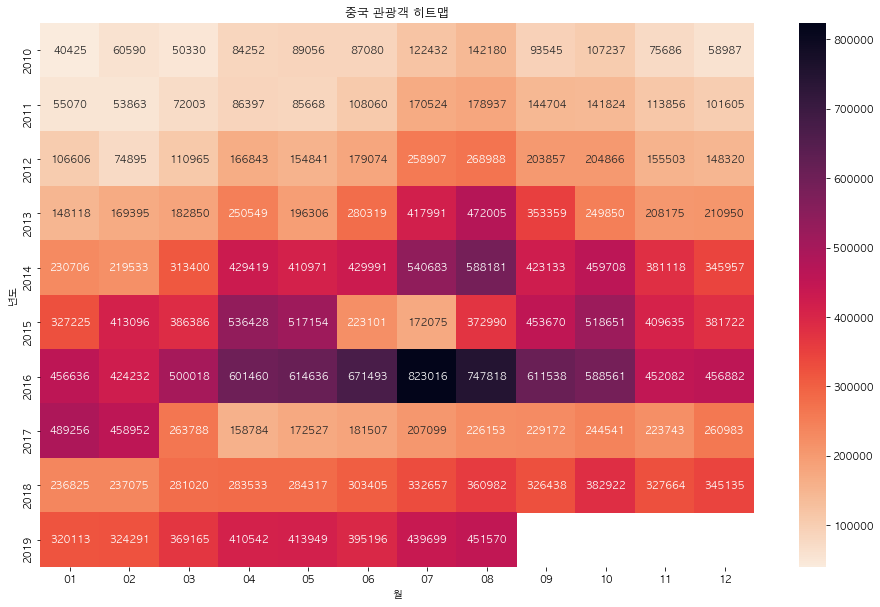

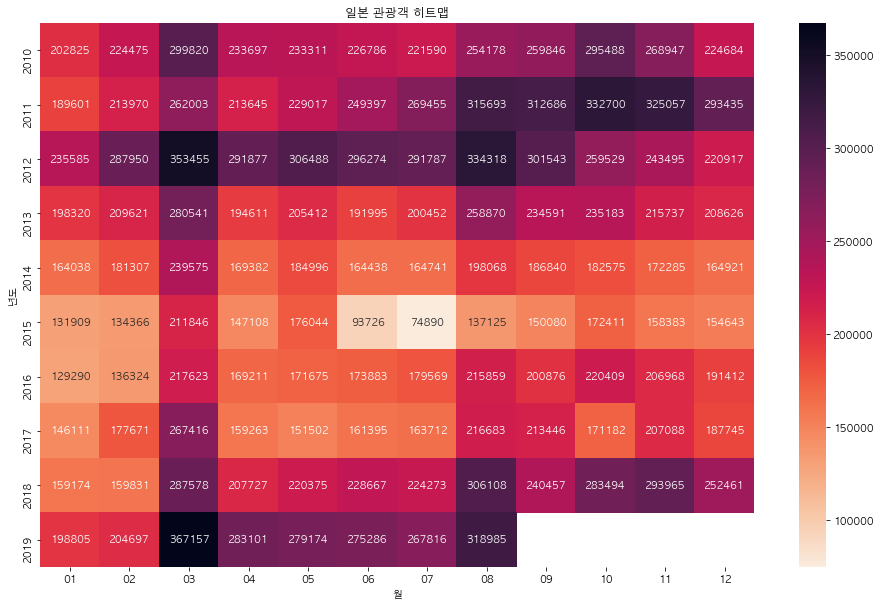

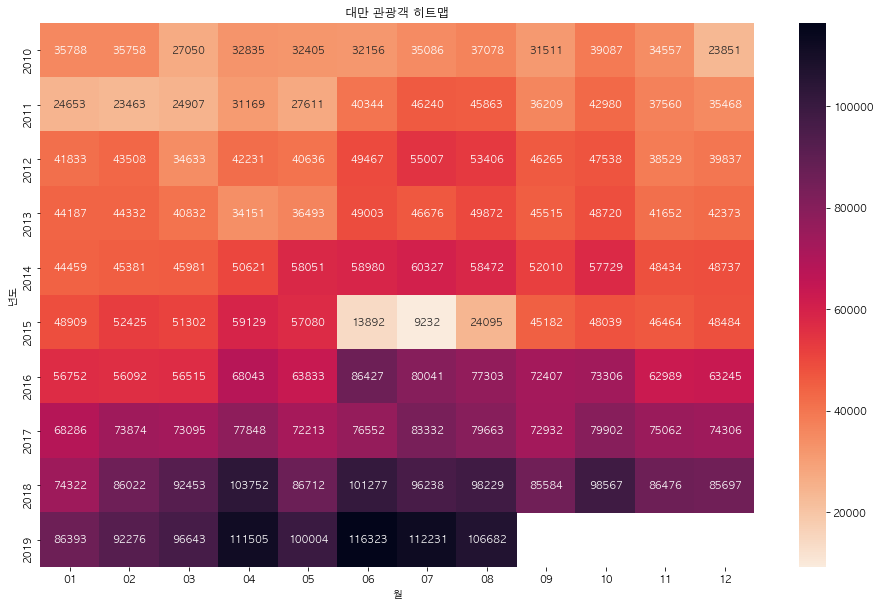

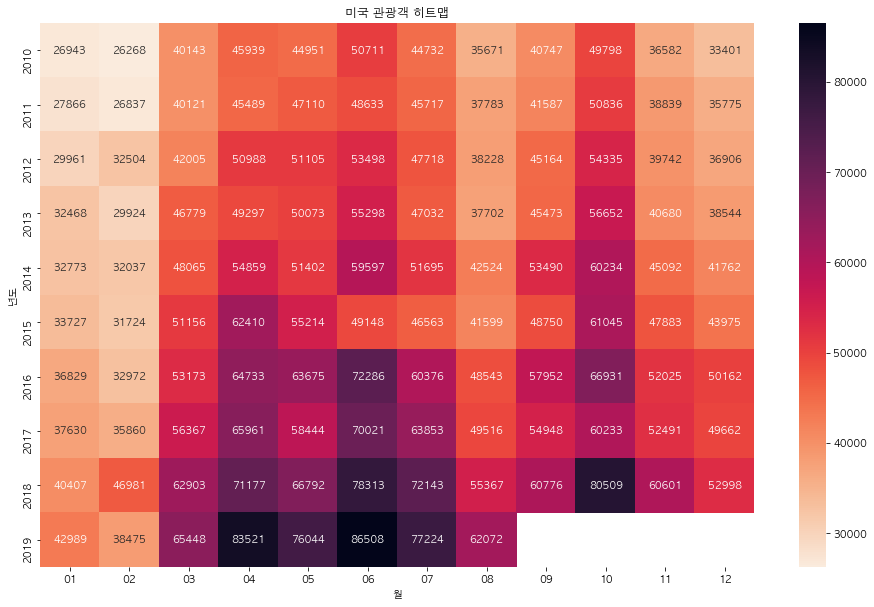

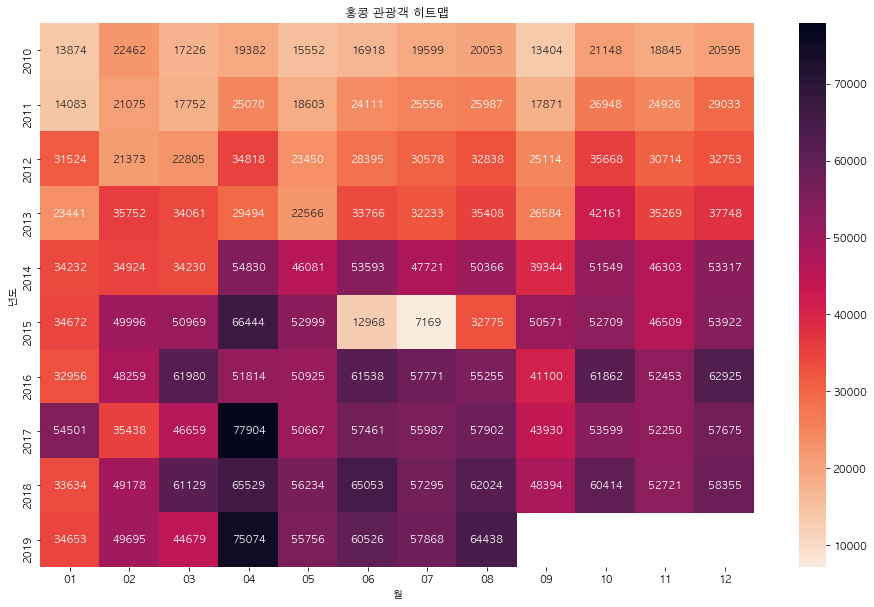

In [31]:
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',
                                index = '년도',
                                columns = '월')
    
    plt.figure(figsize= (16, 10))
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap ='rocket_r')

    # 그래프 타이틀
    plt.title('{} 관광객 히트맵'.format(cntry))

    plt.show()

In [ ]:
# 시계열 그래프 분석
# 트렌드 분석 : 2010년부터 2016년까지 관광객 수가 꾸준히 증가하는 추이
# 이벤트 분석 : 2017년 초에 관광객수가 급격히 감소
# 이벤트 분석 : 2015년 여름(중순) 관광객 수가 최대값을 나타남
# 계절적 분석 : 매년 여름 관광객수가 최대값
# 트렌드 분석 : 2017년 이후부터는 완만하게 서서히 증가

In [ ]:
# 히트맵 분석
# 이벤트 : 2015년 6월 ~ 8월 관광객 감소
#        2017년 3월 ~ 6월 관광객 감소